# Investigating the Efficiency and Multiprogramming Ability of AWS EC2 Instances

<strong> Team 001 </strong>: Jason Platt, Jennifer Chien, Shuhao Chang, Yuanzhen Lin, Srishti Palani

In [5]:
# the command for viewing this python notebook as slides is as follows, this allows us to hide code that is not necessary (just copy paste into terminal)
# jupyter nbconvert {PATH_TO_Team001_HW2.ipynb} --to slides --no-prompt --TagRemovePreprocessor.remove_input_tags={\"to_remove\"} --post serve --SlidesExporter.reveal_theme=simple

jupyter nbconvert Team001_HW2.ipynb --to slides --no-prompt --TagRemovePreprocessor.remove_input_tags={\"to_remove\"} --post serve --SlidesExporter.reveal_theme=simple

SyntaxError: invalid syntax (<ipython-input-5-9396f65b4d91>, line 4)

# Question: 
<strong> How can we achieve the best efficiency and multiprogramming ability for running tasks on EC2 instances using parallelization and not using parallelization? <strong>


### Abstract: 

Cloud Computing enhances our computing power and storage ability by allowing us to run computations on remote computer system resources, when we want to, without having to worry about actively managing resources. Since time spent running the EC2 instances costs money, we want to maximize CPU time and utility for the computing on an EC2 instance. In this project, we did a 2-step investigation of the efficiency and multiprogamming ability of EC2 instances: (i) by exploring the number of processes needed in parallel to maximize the efficiency on a given instance, and (ii) investigating the largest task a given instance can compute.  

For studying this: we wrote a standard python test script that  consumes memory and CPU time. We chose to multiply two NXN matrices with 3 for loops to ensure O(N^3) complexity. Then, we wrote a driver script that kept forking new processes with the standard test program and measure the cpu utility and time taken for computation at the same time. We tested these scripts on 9 EC2 instances chosen based on their memory capacity (large, xlarge, 2xlarge, and 4xlarge), number of cores(c5 - compute optimized, r5 - memory optimized, and m5 - general purpose). 

From this investigation, we concluded that parallelized code outperforms the non-parallel code (especially in overcoming the thrashing limit). Also, compute power in terms of efficiency and multiprogramming ability increases significantly with the cost/size of instances from large, xlarge, 2xlarge, and 4xlarge; and c5-type (aka compute-optimized) instances perform the best when compared to r5 and m5 instances. Lastly, we confirmed our hypothesis that the runtime complexity of parallel matrix multiplication increase as $\mathcal{O}(N^{3})$ making it unlikely that memory or other issues hindered the process much. 

### Motivation
Cloud Computing enhances allows us to run computations on remote computer system resources, when we want to, without having to worry about actively managing resources. However, this ability comes at a price. Cloud providers typically use a "pay-as-you-go" model, which can lead to unexpected operating expenses if programmers or administrators are not familiar with cloud-pricing models. Since we want to maximize CPU time and utility for the cost of using an EC2 instance, in this project, we investigate the efficiency and multiprogramming ability of different EC2 instances using a cost-benefit analysis.


### Method: 
To investigate the multiprogramming ability of different EC2 instances at different costs we: 
* wrote a standard python test script that consumes memory and CPU time. We chose to multiply 2 NXN matrices with 3 for loops to ensure O(N^3) complexity; 
* used python libraries to do parallel matrix multiplication, to see how speedup is related to increased processes; 
* wrote a driver script which keeps forking new processes with  standard test program & measure CPU utility; 

* run both scripts on 9 different EC2 instances chosen based on their memory capacity (large, xlarge, 2xlarge, and 4xlarge), number of cores(c5 - compute optimized, r5 - memory optimized, and m5 - general purpose). 
* analyze the differences to conclude the best strategy for multiprocessing

### Measures: 
 
<strong> Multiprogramming Ability: </strong> One of the most important roles of an Operating System is to assign compute power to the many processes that need to be executed. Without multi-programming, as soon as one job leaves the CPU and goes for some other task (say I/O), the CPU becomes idle. The CPU keeps waiting and waiting until this job (which was executing earlier) comes back and resumes its execution with the CPU. So CPU remains free, idle, and un-utilized for a long time while it could have been executing other jobs that are ready to be executed, but can't be executed because the CPU is allocated to the earlier job.  To avoid situations like this and come up with efficient utilization of CPU, the concept of multi-programming came up. 

Multiprogramming ability is measured by the number of processes when CPU utility reaches the maximum point. When the number of processes does not exceed this point, the CPU is not fully used. After this point, cache and memory are not large enough to support all processes and they have to frequently require disk I/O, which leads to the decrease of CPU utilization called "Thrashing". Due to various cache and memory configuration of different types of EC2 instances, they have different multiprogramming levels. We want to check the maximum multiprogramming ability of different AWS EC2 instances.

<strong> Efficiency: </strong> Time taken compared to the number of processes used for the task. 

<strong> Speedup (only in the parallelized task): </strong>  The relative performance of two systems processing the same problem. More technically, it is the improvement in speed of execution of a task executed on two similar architectures with different resources. 

#  Import Data

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

sns.set(style="darkgrid", context="talk", font_scale=0.8)
sns.set_palette('colorblind')
print(pd.__version__)

all_data_df=pd.read_csv(os.getcwd()+'/Data/All_Data.csv')
all_data_df.head()

1.0.1


,c5large_size_arr,c5large_num_proc,c5large_time_avg,c5large_time_std,c5large_cpu_ut_avg,c5large_cpu_ut_std,c5xlarge_size_arr,c5xlarge_num_proc,c5xlarge_time_avg,c5xlarge_time_std,...,m52xlarge_time_avg,m52xlarge_time_std,m52xlarge_cpu_ut_avg,m52xlarge_cpu_ut_std,m54xlarge_size_arr,m54xlarge_num_proc,m54xlarge_time_avg,m54xlarge_time_std,m54xlarge_cpu_ut_avg,m54xlarge_cpu_ut_std
0,1.0,1.0,0.001975,0.000489,7.500,23.848480,1.0,1.0,0.002566,0.000620,...,0.002366,0.000362,6.2500,24.20614591,1,1,0.002384,0.000356,0.93750,8.788975694
1,1.0,2.0,0.002731,0.000074,25.000,43.301270,1.0,2.0,0.002808,0.000173,...,0.002817,0.000082,11.2500,31.59806165,1,2,0.002892,0.000042,4.06250,19.34221016
2,1.0,4.0,0.005025,0.000040,47.500,48.669806,1.0,4.0,0.004706,0.000191,...,0.004601,0.000164,15.6250,34.08972536,1,4,0.004354,0.000049,4.06250,19.34221016
3,1.0,8.0,0.010276,0.001023,83.335,35.745241,1.0,8.0,0.008722,0.000605,...,0.008332,0.000526,33.7500,44.56385867,1,8,0.007967,0.000433,12.18750,30.48917585
4,1.0,16.0,0.020079,0.000243,98.335,7.257567,1.0,16.0,0.016030,0.000468,...,0.015340,0.000236,38.4375,37.58115676,1,16,0.014663,0.000111,14.26875,27.50151629


In [3]:
data = pd.read_pickle("pf.pkl")
new_data = []
for i in range(len(data)):
    temp = list(data.iloc[i][['N', '#procs', 'p_t_mean', 'p_t_std', 'p_c_mean', 'p_c_std', 'instance']])
    temp.append(True)
    new_data.append(temp)
    temp = list(data.iloc[i][['N', '#procs', 'np_t_mean', 'np_t_std', 'np_c_mean', 'np_c_std', 'instance']])
    temp.append(False)
    new_data.append(temp)
new_data = pd.DataFrame(new_data, columns=['N', '#procs', 'time_mean', 'time_std', 'cpu_mean', 'cpu_std', 'instance', 'parallel'])

new_data.to_csv("parallel_results.csv")
m5large = new_data['instance'] == 'm5large'
m5xlarge = new_data['instance'] == 'm5xlarge'
m52xlarge = new_data['instance'] == 'm52xlarge'
r5large = new_data['instance'] == 'r5large'
r5xlarge = new_data['instance'] == 'r5xlarge'
r52xlarge = new_data['instance'] == 'r52xlarge'
c5large = new_data['instance'] == 'c5large'
c5xlarge = new_data['instance'] == 'c5xlarge'
c52xlarge = new_data['instance'] == 'c52xlarge'

# Results: Task 1 Parallelized Practical task:
<strong> Question: Given a certain task, how many processes should be spawned on a given instance to maximize the efficiency of computation.</strong>  In other words, given a fixed matrix size, how many processes can achieve the highest efficiency/shortest time? 

### Experiment: Task 1 Parallelized Practical task: 
* Split the matrix multiplication task in num_proc number of problems.  Give each problem to a child process to complete and then measure the time it takes to execute. 
* Compare efficiency and multiprorgamming ability across 9 different EC2 instances chosen based on their memory capacity (large, xlarge, 2xlarge, and 4xlarge), number of cores(c5 - compute optimized, r5 - memory optimized, and m5 - general purpose). Analyze the differences to conclude the best strategy for multiprocessing

### 1. Comparison across instance types

To answer this question we compare the different kinds of instances to one another in terms of both the time it takes to finish each process (i.e., the time for that worker process to spawn, complete the task and terminate) as well as the total cpu utility.  Also whether the computation is parallelized (True) or not (False).

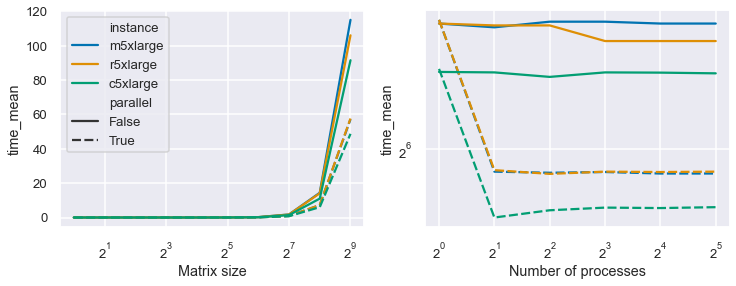

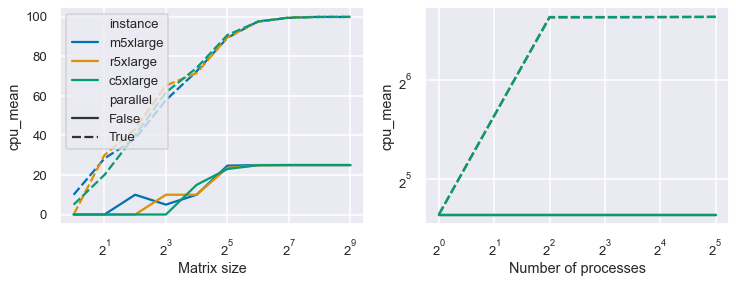

In [4]:
warnings.filterwarnings('ignore')
def mylineplot(data, criterion):
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(12, 4))

    sns.lineplot(x='N', y=criterion, hue='instance', style='parallel',data=data[data['#procs']==16], ax=ax1)
    ax1.set_xlabel('Matrix size')
    #ax1.set_ylabel('Wall time (s)')
    ax1.set_xscale('log', basex=2)
    ax2.set_yscale('log', basey=2)

    sns.lineplot(x='#procs', y=criterion, hue='instance', style='parallel', data=data[data['N']==512], ax=ax2, legend=None)
    ax2.set_xlabel('Number of processes')
    #ax2.set_ylabel('Wall time (s)')
    ax2.set_xscale('log', basex=2)
    ax2.set_yscale('log', basey=2)
    
# xlarge series
mylineplot(new_data[m5xlarge+r5xlarge+c5xlarge], 'time_mean')
mylineplot(new_data[m5xlarge+r5xlarge+c5xlarge], 'cpu_mean')

### Figure 1: Comparison across instance types

The conclusion from the previous plot is that, as expected, the parallelized code outperforms the non-parallel code.  One can see this both from the cpu utilization graph, where the parallel code was more efficient in using the computational resources of the computer, and from the time per process.

Another conclusion is that the speedup from multiprocessing quickly caps out once a certain number of processes have been spawned.  The top right plot shows that once we have a certain number of children (equal to the number of cores in the computer), the time per process stays constant.  Since the problem is being split into more and more pieces this gives a maximum number of processes beyond which there is no more benefit.  We do not seem to have reach a thrashing limit, or rather the effect of thrashing is dwarfed by the speed up gained by multiprocessing.

### 2. Comparison among the same instance type

In [3]:
# m series
mylineplot(new_data[m5large+m5xlarge+m52xlarge], 'time_mean')
mylineplot(new_data[m5large+m5xlarge+m52xlarge], 'cpu_mean')

NameError: name 'mylineplot' is not defined

### Figure 2: Comparison among the same instance type

Now comparing across the same instance it is clear that "you get what you pay for" in terms of computing power.  The top right hand plot shows that the time per process levels out at a much higher level for multiprocessing on the large cluster than on the xlarge or 2xlarge.  We do see, however, a different point at which we maximize the cpu utility for different instances.  Depending on how bug a task is it might make more sense to use the smaller machines.  For instance, one needs 8 processes to maximize the cpu utility on the 2xlarge instance.

# Results: Task 2 Non-Parallelized Theoretical task:

<strong> Question: What is the maximum throughput (Flops/second) for a given instance? </strong> In other words, given a fixed machine what is the largest task we can do?

In [4]:
'''
Load and process data into dataframe format
'''
c52xlarge=pd.read_csv(os.getcwd()+'/Data/c52xlarge.csv')
c5xlarge=pd.read_csv(os.getcwd()+'/Data/c5xlarge.csv')
c5large=pd.read_csv(os.getcwd()+'/Data/c5large.csv')
m54xlarge=pd.read_csv(os.getcwd()+'/Data/m54xlarge.csv')
m52xlarge=pd.read_csv(os.getcwd()+'/Data/m52xlarge.csv')
m5xlarge=pd.read_csv(os.getcwd()+'/Data/m5xlarge.csv')
m5large=pd.read_csv(os.getcwd()+'/Data/m5large.csv')
r54xlarge=pd.read_csv(os.getcwd()+'/Data/r54xlarge.csv')
r52xlarge=pd.read_csv(os.getcwd()+'/Data/r52xlarge.csv')
r5xlarge=pd.read_csv(os.getcwd()+'/Data/r5xlarge.csv')
r5large=pd.read_csv(os.getcwd()+'/Data/r5large.csv')
c5large_raw = np.load(os.getcwd()+'/Data/raw/raw_data_c5large.npz')
c5xlarge_raw = np.load(os.getcwd()+'/Data/raw/raw_data_c5xlarge.npz')
c52xlarge_raw = np.load(os.getcwd()+'/Data/raw/raw_data_c52xlarge.npz')
r5large_raw = np.load(os.getcwd()+'/Data/raw/raw_data_r5large.npz')
r5xlarge_raw = np.load(os.getcwd()+'/Data/raw/raw_data_r5xlarge.npz')
r52xlarge_raw = np.load(os.getcwd()+'/Data/raw/raw_data_r52xlarge.npz')
r54xlarge_raw = np.load(os.getcwd()+'/Data/raw/raw_data_r54xlarge.npz')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/srishtipalani/Desktop/Public-DSC291/Team001/hw2/Data/raw/raw_data_c5large.npz'

## Experiment: Task 2 Non-Parallelized Theoretical task:
In this experiment we keep forking new processes each of which has to complete the entire matrix multiplication task.  Thus, we are attempting to calculate the maximum throughput of the computer as it relates to the number of processes

### 3. Comparing Time to Completion by Number of Processes

Text(0.5, 0, 'Number of Processes')

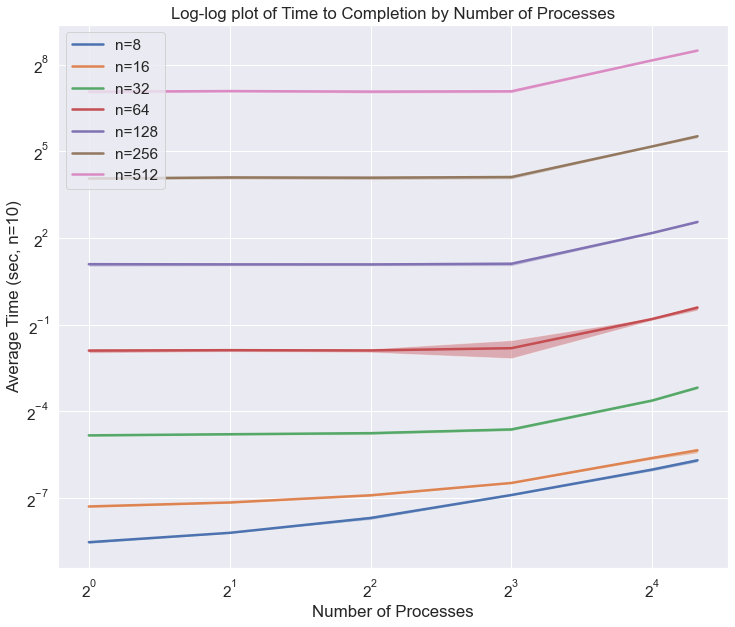

In [18]:
sns.set(font_scale=1.4)
ax = m54xlarge[m54xlarge.size_arr == 8].set_index('num_proc')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="n=8")
m54xlarge[m54xlarge.size_arr == 16].set_index('num_proc')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="n=16")
m54xlarge[m54xlarge.size_arr == 32].set_index('num_proc')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="n=32")
m54xlarge[m54xlarge.size_arr == 64].set_index('num_proc')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="n=64")
m54xlarge[m54xlarge.size_arr == 128].set_index('num_proc')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="n=128")
m54xlarge[m54xlarge.size_arr == 256].set_index('num_proc')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="n=256")
m54xlarge[m54xlarge.size_arr == 512].set_index('num_proc')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="n=512")

ax.fill_between(m54xlarge[m54xlarge.size_arr == 8]['num_proc'], 
                m54xlarge[m54xlarge.size_arr == 8]['time_avg']+2*m54xlarge[m54xlarge.size_arr == 8]['time_std'], 
                m54xlarge[m54xlarge.size_arr == 8]['time_avg']-2*m54xlarge[m54xlarge.size_arr == 8]['time_std'], 
                alpha = 0.4, interpolate=True)
ax.fill_between(m54xlarge[m54xlarge.size_arr == 16]['num_proc'], 
                m54xlarge[m54xlarge.size_arr == 16]['time_avg']+2*m54xlarge[m54xlarge.size_arr == 16]['time_std'], 
                m54xlarge[m54xlarge.size_arr == 16]['time_avg']-2*m54xlarge[m54xlarge.size_arr == 16]['time_std'], 
                alpha = 0.4, interpolate=True)
ax.fill_between(m54xlarge[m54xlarge.size_arr == 32]['num_proc'], 
                m54xlarge[m54xlarge.size_arr == 32]['time_avg']+2*m54xlarge[m54xlarge.size_arr == 32]['time_std'], 
                m54xlarge[m54xlarge.size_arr == 32]['time_avg']-2*m54xlarge[m54xlarge.size_arr == 32]['time_std'], 
                alpha = 0.4, interpolate=True)
ax.fill_between(m54xlarge[m54xlarge.size_arr == 64]['num_proc'], 
                m54xlarge[m54xlarge.size_arr == 64]['time_avg']+2*m54xlarge[m54xlarge.size_arr == 64]['time_std'], 
                m54xlarge[m54xlarge.size_arr == 64]['time_avg']-2*m54xlarge[m54xlarge.size_arr == 64]['time_std'], 
                alpha = 0.4, interpolate=True)
ax.fill_between(m54xlarge[m54xlarge.size_arr == 128]['num_proc'], 
                m54xlarge[m54xlarge.size_arr == 128]['time_avg']+2*m54xlarge[m54xlarge.size_arr == 128]['time_std'], 
                m54xlarge[m54xlarge.size_arr == 128]['time_avg']-2*m54xlarge[m54xlarge.size_arr == 128]['time_std'], 
                alpha = 0.4, interpolate=True)
ax.fill_between(m54xlarge[m54xlarge.size_arr == 256]['num_proc'], 
                m54xlarge[m54xlarge.size_arr == 256]['time_avg']+2*m54xlarge[m54xlarge.size_arr == 256]['time_std'], 
                m54xlarge[m54xlarge.size_arr == 256]['time_avg']-2*m54xlarge[m54xlarge.size_arr == 256]['time_std'], 
                alpha = 0.4, interpolate=True)
ax.fill_between(m54xlarge[m54xlarge.size_arr == 512]['num_proc'], 
                m54xlarge[m54xlarge.size_arr == 512]['time_avg']+2*m54xlarge[m54xlarge.size_arr == 512]['time_std'], 
                m54xlarge[m54xlarge.size_arr == 512]['time_avg']-2*m54xlarge[m54xlarge.size_arr == 512]['time_std'], 
                alpha = 0.4, interpolate=True)

ax.legend()
plt.title("Log-log plot of Time to Completion by Number of Processes")
plt.xscale('log',basex=2)
plt.yscale('log',basey=2)
ax.set_ylabel("Average Time (sec, n=10)")
ax.set_xlabel("Number of Processes")

### Figure 3: Log-log plot of Time to Completion by Number of Processes

What we see here is a comparison of the average amount of time for each matrix multiplication task to finish and the number of processes doing the processing at the same time.  The semi-transparent shading above and below the line shows two standard deviations above and below the mean log time to complete the task. The main feature here is the flat line up to $2^3$ processes, indicating that 8 matrix multiplications can be going on in parallel without affecting the speed of the others.  After 8 they start interfering with one another and the computation time increases.

For low matrix sizes N < 32 we see that the overhead for creating a new process is a significant contributor to the overall time.  This is indicated by the positive slope for those lines before the cutoff point of num proc = $2^3$.

# 4. Comparing Time to Completion across Number of Processes: One-Way ANOVA & Post-Hoc Analysis Results

To test if the difference between the times to completion across the number of processes is statistically significant, we performed a One-Way ANOVA of the Number of Processes (1, 2, 4, 8, 16, 20) with the time to completion. We found that there were significant differences across the number of processes (F(5,426) = 15.34, p=0.000). 20 processes took the longest time (M=59.89, SD=40.86), followed by 16 processes (M=59.05, SD=40.86), 8 processes (M=54.19, SD=40.52), 4 processes (M=41.13, SD=36.28), 2 processes (M=31.25, SD=30.93) and fastest which was 1 process (M=19.25, SD=21.35). 

To investigate these differences further, we conducted Tukey's post-hoc analysis. Through this we found that the 1 process was significantly different than 4, 8, 16, 20 processes, but not significantly different than 2 processes. Similarly, 2 processes was significant with 8, 16, 20 processes, but not significantly different than 1, or 4 processes. 4 processes was significantly different than 1, 16, 20. 8 processes was significantly different than 1,and 2 processes. 16 processes with 1, and 4 processes. Lastly, 20 processes was significantly different than 1, 2, 4, but not 16, and 20. 

## 4. Calculations per Second

We can normalize the graph by both the matrix size and the number of processes to give us the number of calculations output per second for each situation

Text(0.5, 0, 'Number of Processes')

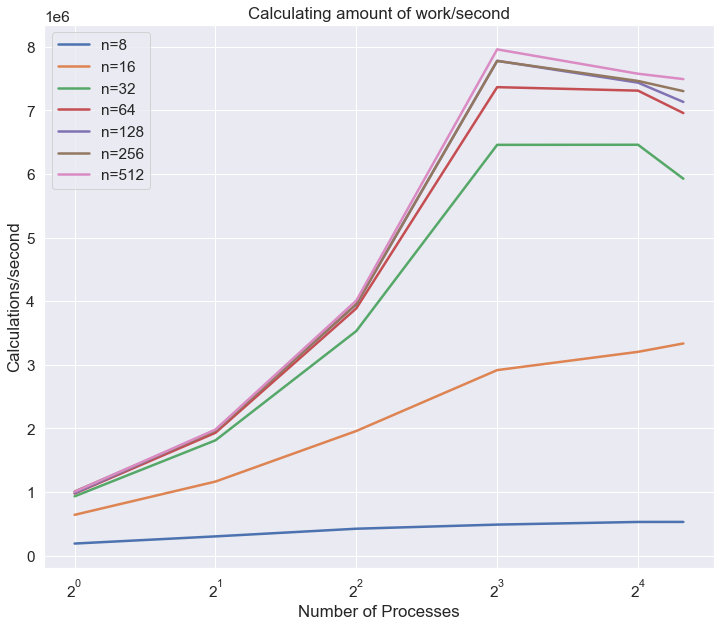

In [19]:
sns.set(font_scale=1.4)
num_proc = np.array([1, 2, 4, 8, 16, 20])
ax = (8**3/m54xlarge[m54xlarge.size_arr == 8].set_index('num_proc')['time_avg']*num_proc).plot(figsize=(12, 10), linewidth=2.5, label="n=8")
(16**3/m54xlarge[m54xlarge.size_arr == 16].set_index('num_proc')['time_avg']*num_proc).plot(figsize=(12, 10), linewidth=2.5, label="n=16")
ax = (32**3/m54xlarge[m54xlarge.size_arr == 32].set_index('num_proc')['time_avg']*num_proc).plot(figsize=(12, 10), linewidth=2.5, label="n=32")
(64**3/m54xlarge[m54xlarge.size_arr == 64].set_index('num_proc')['time_avg']*num_proc).plot(figsize=(12, 10), linewidth=2.5, label="n=64")
(128**3/m54xlarge[m54xlarge.size_arr == 128].set_index('num_proc')['time_avg']*num_proc).plot(figsize=(12, 10), linewidth=2.5, label="n=128")
(256**3/m54xlarge[m54xlarge.size_arr == 256].set_index('num_proc')['time_avg']*num_proc).plot(figsize=(12, 10), linewidth=2.5, label="n=256")
(512**3/m54xlarge[m54xlarge.size_arr == 512].set_index('num_proc')['time_avg']*num_proc).plot(figsize=(12, 10), linewidth=2.5, label="n=512")

ax.legend()
plt.title("Calculating amount of work/second")
plt.xscale('log',basex=2)
# plt.yscale('log',basey=2)
ax.set_ylabel("Calculations/second")
ax.set_xlabel("Number of Processes")

### Figure 4: Calculating Amount of Work/Second

As we increase the number of processes, we see that the number of calculations/second increases in all matrix sizes. At the point where we see $2^3$ processes, we see a peak in the number of calculations/second, this is because at this point all of the cores are being used.

Intuitively, if one would like to maximize the work done by the computer it is better to have larger computations than smaller ones for each process.  There is, as always, a law of diminishing returns and the output of the computer peaks around 8,000,000 calculations per second before declining after the number of processes increases.

### 5. Comparing different instances

Text(0, 0.5, 'Time per Process (s)')

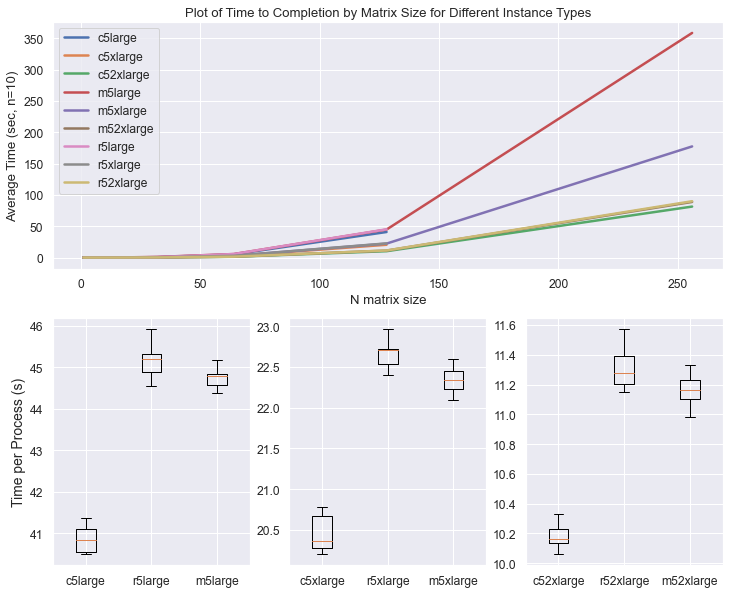

In [20]:
fig = plt.figure(figsize = (10, 8))
sns.set(font_scale=1.1)
ax1 = fig.add_subplot(2,1,1)
c5large[c5large.num_proc == 20].set_index('size_arr')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="c5large")
c5xlarge[c5xlarge.num_proc == 20].set_index('size_arr')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="c5xlarge")
c52xlarge[c52xlarge.num_proc == 20].set_index('size_arr')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="c52xlarge")
m5large[m5large.num_proc == 20].set_index('size_arr')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="m5large")
m5xlarge[m5xlarge.num_proc == 20].set_index('size_arr')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="m5xlarge")
m52xlarge[m52xlarge.num_proc == 20].set_index('size_arr')['time_avg'][:-1].plot(figsize=(12, 10), linewidth=2.5, label="m52xlarge")
r5large[r5large.num_proc == 20].set_index('size_arr')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="r5large")
r5xlarge[r5xlarge.num_proc == 20].set_index('size_arr')['time_avg'].plot(figsize=(12, 10), linewidth=2.5, label="r5xlarge")
r52xlarge[r52xlarge.num_proc == 20].set_index('size_arr')['time_avg'][:-1].plot(figsize=(12, 10), linewidth=2.5, label="r52xlarge")

ax1.legend()
# ax.legend()
ax1.set_ylabel("Average Time (sec, n=10)")
ax1.set_xlabel("N matrix size")
# plt.xscale('log',basex=2)
# plt.yscale('log',basey=2)
plt.title("Plot of Time to Completion by Matrix Size for Different Instance Types")

ind = 47
data_large = np.vstack((c5large_raw['times'][ind].T,
                        r5large_raw['times'][ind].T,
                        np.random.normal(loc=m5large['time_avg'].iloc[ind],
                        scale=m5large['time_std'].iloc[ind],
                        size = (10,1)).T))
labels_large = ['c5large', 'r5large', 'm5large']

data_xlarge = np.vstack((c5xlarge_raw['times'][ind].T,
                        r5xlarge_raw['times'][ind].T,
                        np.random.normal(loc=m5xlarge['time_avg'].iloc[ind],
                        scale=m5xlarge['time_std'].iloc[ind],
                        size = (10,1)).T))
labels_xlarge = ['c5xlarge', 'r5xlarge', 'm5xlarge']

data_2xlarge = np.vstack((c52xlarge_raw['times'][ind].T,
                          r52xlarge_raw['times'][ind].T,
                          np.random.normal(loc=m52xlarge['time_avg'].iloc[ind],
                          scale=m52xlarge['time_std'].iloc[ind],
                          size = (10,1)).T))
labels_2xlarge = ['c52xlarge', 'r52xlarge', 'm52xlarge']

ax2 = fig.add_subplot(2,3,4)
ax3 = fig.add_subplot(2,3,5)
ax4 = fig.add_subplot(2,3,6)

ax2.boxplot(data_large.T, labels = labels_large)
ax3.boxplot(data_xlarge.T, labels = labels_xlarge)
ax4.boxplot(data_2xlarge.T, labels = labels_2xlarge)
ax2.set_ylabel('Time per Process (s)', fontsize = 14)
# ax2.set_title('N = 128, num proc = 20', fontsize = 20)

### Figure 5: Comparing across different instances

Comparing the different instance types, the c-type instances are the best if you would like to maximize throughput (lower time per process is better).  This would make sense because c are the "compute optimized" ec2 instances. This is also interesting because the c-type instances are the cheapest of the types of instances we considered. 

### 5. Comparing Across Instances: One-way ANOVA Results 

To test if the difference between the times to completion across the number of processes is statistically significant, we performed a One-Way ANOVA of the 9 Instances with the time to completion. We found that there were significant differences across the instances for the average time to completion (F(8,426) = 96.50, p=0.000). All of  The c-type instances, and the xlarge-type instances took the least amount of time. 

To investigate these differences further, we conducted Tukey's post-hoc analysis. All of the differences between the c5 and r5, m5 instances were significant across sizes (large, xlarge, and 2xlarge). Similarly, all of the differences between r5 and m5 instances were significantly different for all sizes, except for the difference between the xlarges and 2x large sizes of the r5 and m5 type.

## 6. Investigating Cacheing or other issues

Theoretically the amount of work should increase as $\mathcal{O}(N^{3})$ for a matrix multiplication procedure.  To see if this were the case or if other issues, such as memory access, would pop up we fit the curve of time per process (proxy for the amount of work) as the size of the matrix increases.  The fit was $\mathcal{O}(N^{2.96})$ making it unlikely that memory or other issues contributed much.

Text(0.5, 1.0, 'Complexity of Matrix Multiplication num_proc = 20')

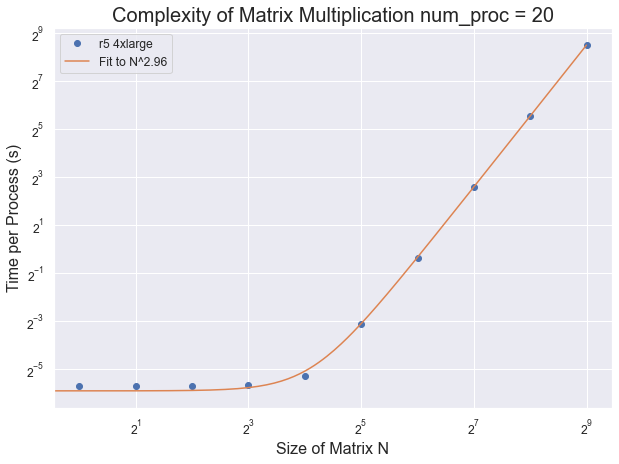

In [36]:
from scipy.optimize import curve_fit
x = np.power(2*np.ones(10), range(10))
data = r54xlarge_raw['times']
data = np.mean(data[5::6], axis = 1)

power_fit = lambda x, a, b, c: a*np.power(x, b)+c
popt, pcov = curve_fit(power_fit, x, data)

fig = plt.figure(figsize = (10,7))
plt.plot(x, data, 'o', label = 'r5 4xlarge')
plt.plot(np.arange(2**9), power_fit(np.arange(2**9), *popt),
        label = 'Fit to N^{:.2f}'.format(popt[1]))
plt.legend()
plt.xscale('log', basex = 2)
plt.yscale('log', basey = 2)
plt.xlabel('Size of Matrix N', fontsize = 16)
plt.ylabel('Time per Process (s)', fontsize = 16)
plt.title('Complexity of Matrix Multiplication num_proc = 20', fontsize = 20)

### 6. Investigating the results of Caching and other issues: Results from Curve Fitting 

The data fitted the curve with a line of best fit of $\mathcal(N^{2.96})$ (~$\mathcal(N^{3})$ ), with an error of 0.0003. This was statistically significant at p=0.04 allowing us to confirm our hypothesis that this line would be $\mathcal(N^{3})$ .

# Conclusion

In this project, we did a 2-step investigation of the efficiency and multi-programming ability of EC2 instances: (i) by exploring the number of processes needed in parallel to maximize the efficiency on a given instance, and (ii) investigating the largest task a given instance can compute. 

Comparing the parallelized task to the non-parallelized task, we concluded that parallelized code outperforms the non-parallel code (especially in overcoming the thrashing limit of CPU utility). We had expected to see a thrashing limit for CPU utility in instances as we increased the task load. However, in the non-parallelized code, we had to kill instances that were taking longer than a few hours and could not record this in our data. These instances might have run extra long because of thrashing issues however, this is just conjecture since we have incomplete data for these instances. On the other hand, in the parallelized code we could see that the speedup from multiprocessing quickly caps out once a certain number of processes that were spawned. Since the problem is being split into more and more pieces this gives a maximum number of processes beyond which there is no more benefit.  We do not seem to have reached a thrashing limit, or rather the effect of thrashing is dwarfed by the speed up gained by multiprocessing. This shows that the parallelized code overcomes the thrashing limit, while the non-parallelized code doesn't. 

Furthermore, we tested the multiprogramming ability  on 9 EC2 instances chosen based on their memory capacity (large, xlarge, 2xlarge, and 4xlarge) and the number of cores (c5 - compute optimized, r5 - memory optimized, and m5 - general purpose). We found that compute power (in terms of efficiency and multiprogramming ability) increases significantly with the cost/size of instances from large, xlarge, 2xlarge, and 4xlarge; and c5-type (aka compute-optimized) instances perform the best when compared to r5 and m5 instances. It made sense that as the number of cores increased the efficiency increased - as the load is distributed across the cores till they all reach 100% cpu utility. It was interesting to see that the c5 instances were the most efficient and the cheapest of the instances we covered. This might be because computation power costs less than storage costs on AWS.  Since different instances max out their cpu utility at different number of processes, depending on how big a task is, it might make more sense to use the smaller machines. For instance, one needs 8 processes to maximize the cpu utility on the 2xlarge instance.

Lastly, we confirmed our hypothesis that the runtime complexity of parallel matrix multiplication increases at $\mathcal{O}(N^{3})$ (hypothesized: $\mathcal{O}(N^{3})$). This accuracy suggests that it is unlikely that memory or other issues hindered the computing process much. 